TO JE KOMENTAR CELOTNE NALOGE:
    prvi del
    drugi del 
    in tako dalje

In [2]:
import pandas as pd

import matplotlib

#izrisujemo rezultate
%matplotlib inline 

import numpy as np
import math

from matplotlib import pyplot as plot

In [3]:
#uvozimo vse podatke, ki smo jih dobili na spletni strani ATP
vsi_podatki = pd.read_csv('podatki.csv', encoding = "utf-8", sep=';',thousands=",")

#popravimo rojstne dneve, da lahko kasneje dostopamo do leta, meseca in dneva rojstva
vsi_podatki['Birthday'] = pd.to_datetime(vsi_podatki['Birthday'], format="%Y.%m.%d")

#podatki nekaj igralcev, da vidimo, s cim se ukvarjamo
vsi_podatki[:10]

,Rank,Country,Age,Birthday,Weight,Height,WL_17,T17,Earn17,Career_high,WL_career,T_career,Earn_career
RafaelNadal,1,ESP,31,1986-06-03,85.0,185.0,67-11,6,15851340,1,873-185,75,94588627
RogerFederer,2,SUI,36,1981-08-08,85.0,185.0,52-5,7,13054856,1,1132-250,95,111885682
GrigorDimitrov,3,BUL,26,1991-05-16,80.0,191.0,49-19,4,6575244,3,257-161,8,14083976
AlexanderZverev,4,GER,20,1997-04-20,86.0,198.0,55-22,5,5006313,3,117-70,6,7041628
DominicThiem,5,AUT,24,1993-09-03,82.0,185.0,49-27,1,4283907,4,171-109,8,9507497
MarinCilic,6,CRO,29,1988-09-28,89.0,198.0,44-22,1,4004923,4,435-232,17,20919276
DavidGoffin,7,BEL,27,1990-12-07,68.0,180.0,59-24,2,3890613,7,201-128,4,8995195
JackSock,8,USA,25,1992-09-24,84.0,191.0,38-21,3,3149419,8,153-103,4,8171779
StanWawrinka,9,SUI,32,1985-03-28,81.0,183.0,26-11,1,3083829,3,465-262,16,30905144
PabloCarrenoBusta,10,ESP,26,1991-07-12,78.0,188.0,36-26,1,2843305,10,111-110,3,5746293


In [40]:
vsi_podatki.iloc[1]

Rank                             2
Country                        SUI
Age                             36
Birthday       1981-08-08 00:00:00
Weight                          85
Height                         185
WL_17                         52-5
T17                              7
Earn17                    13054856
Career_high                      1
WL_career                 1132-250
T_career                        95
Earn_career              111885682
Name: RogerFederer, dtype: object

In [631]:
podatki = vsi_podatki[:400]
pogosta_starost = podatki.groupby('Age').count()
pogosta_starost = pogosta_starost.loc[pogosta_starost['Rank']>12].index
starost = podatki[podatki['Age'].isin(pogosta_starost)].groupby('Age')['Rank'].mean().sort_values()
starost

#vsi_podatki[:400].groupby('Age').count()

# a naj kle vkljucim tud tiste 31 stare, k jih je samo 13? (spreminjas > 12)

#rojstni_dnevi[:100].plot(x ='Age', y='Rank', kind='bar', title='Razmerje',legend=False,figsize=(10,10))

Age
31    116.923077
29    149.818182
32    163.117647
30    178.000000
25    193.567568
22    195.190476
27    195.627907
28    220.076923
20    228.391304
21    232.187500
23    235.347826
26    237.777778
24    244.178571
19    251.933333
Name: Rank, dtype: float64

Med top 400 igralci so povprecno najvisje uvrsceni igralci, ki so stari 29 let.

8


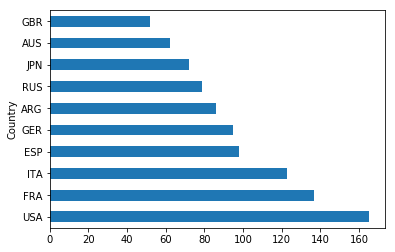

In [12]:
#Pogledamo, katera drzava ima najvec profesionalnih moskih igralcev
drz = vsi_podatki.groupby('Country').size()
drz = drz.sort_values(ascending=False)
drz[:10].plot(kind='barh')
print(drz['SLO'])

Najvec profesionalnih tenisacev prihaja iz Zdruzenih drzav Amerike, medtem ko je profesionalnih Slovencev 8.

In [30]:
drzave = drz[:10].index
rank = vsi_podatki[vsi_podatki['Country'].isin(drzave)].groupby('Country')['Rank'].min().sort_values()
rank

Country
ESP     1
GER     4
USA     8
ARG    11
FRA    15
GBR    16
AUS    21
JPN    22
ITA    27
RUS    39
Name: Rank, dtype: int64

Najvecje stevilo igralcev ne zagotavlja najboljsih, saj je najboljsi American sele na 8. mestu, medtem ko imajo Spanci (4. najbolj pogost narod) najboljsega igralca.

In [ ]:
#poglejmo sedaj, za koga je bila sezona 2017 najbolj dobickonosna in kaksna je povezava med zasluzki in turnirskimi zmagami

In [ ]:
vsi_podatki.groupby('T_career')['Earn_career'].mean().sort_values(ascending=False).plot(figsize=(10,10))

In [32]:
pla = vsi_podatki.groupby('Age')
#pla['Earn17'].plot()
Podatki_Place = vsi_podatki.merge('Earn17', on = 'Name')
#plot(x='Age',y='Earn17')
pla

ValueError: can not merge DataFrame with instance of type <class 'str'>

In [43]:
high = vsi_podatki.groupby('Career_high')
high.get_group(1)

,Rank,Country,Age,Birthday,Weight,Height,WL_17,T17,Earn17,Career_high,WL_career,T_career,Earn_career
RafaelNadal,1,ESP,31,1986-06-03,85.0,185.0,67-11,6,15851340,1,873-185,75,94588627
RogerFederer,2,SUI,36,1981-08-08,85.0,185.0,52-5,7,13054856,1,1132-250,95,111885682
NovakDjokovic,12,SRB,30,1987-05-22,77.0,188.0,32-8,2,2083741,1,783-163,68,109805403
AndyMurray,16,GBR,30,1987-05-15,84.0,191.0,25-10,1,2071625,1,655-184,45,60807644


Od trenutno aktivnih igralcev so le zgornji 4 v svoji karieri zasedli 1. mesto na lestvici.

In [60]:
vsi_podatki[vsi_podatki['Career_high'] <= 100]['Rank'].count()

221

Od trenutno aktivnih jih je 221 ze bilo nekoc uvrscenih med top 100.

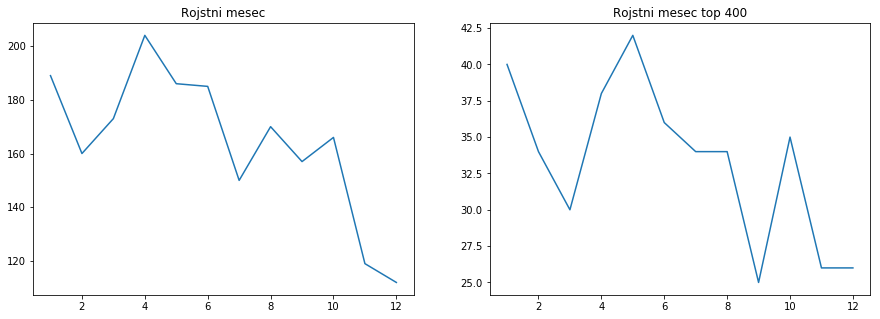

In [48]:
y1 = vsi_podatki.Birthday.dt.month.groupby(by=vsi_podatki.Birthday.dt.month).size()
y2 = vsi_podatki[:400].Birthday.dt.month.groupby(by=vsi_podatki[:400].Birthday.dt.month).size()

plot.figure()
f, axes = plot.subplots(1, 2)
axes[0].set_title('Rojstni mesec')
axes[0].plot(y1)

fig_size = plot.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5

plot.figure()
axes[1].set_title('Rojstni mesec top 400')
axes[1].plot(y2)

plot.tight_layout()

Med preofesionalnimi tenisaci je viden skok v stevilu rojstnih dni januarja, aprila in maja, medtem ko jih je rojenih v novembru in decembru obcutno manj.


In [137]:
meseci = vsi_podatki[:400].Birthday.dt.month.groupby(by=vsi_podatki[:300].Birthday.dt.month).size()
meseci.plot(kind='line')
meseci.sort_values(ascending=False)

TypeError: 'int' object is not subscriptable

In [ ]:
Zgornje 

In [14]:
top100 = vsi_podatki[:100]
top2100 = vsi_podatki[100:200]
a = top100['Height'].mean()
b = top2100['Height'].mean()

top3100 = vsi_podatki[200:300]
c = top3100['Height'].mean()
a, b,c

(186.98, 185.15151515151516, 186.32608695652175)

In [503]:
top100 = vsi_podatki[:100]
top2100 = vsi_podatki[100:200]
a = top100['Weight'].mean()
b = top2100['Weight'].mean()

top3100 = vsi_podatki[200:300]
c = top3100['Weight'].mean()
a, b,c

(80.13, 78.98, 79.30526315789474)

In [54]:
#a = [(0,1),(3,2)]
x = [1,2,3,4]
y=[5,6,7,8]
plot(x = x,y=y)

TypeError: 'module' object is not callable